In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 8.4 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [11]:

# import all required dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn import metrics
from datetime import datetime
plt.style.use('fivethirtyeight')
%matplotlib inline

In [12]:
from google.colab import files
uploaded = files.upload()

Saving Apple.csv to Apple (1).csv


In [52]:
appl_df = pd.read_csv("Apple.csv")
appl_df.head()

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume
0,2018-01-30,41.382500,41.842499,41.174999,41.742500,39.692928,184192800
1,2018-01-31,41.717499,42.110001,41.625000,41.857498,39.802288,129915600
2,2018-02-01,41.792500,42.154999,41.689999,41.945000,39.885487,188923200
3,2018-02-02,41.500000,41.700001,40.025002,40.125000,38.154850,346375200
4,2018-02-05,39.775002,40.970001,39.000000,39.122501,37.201584,290954000


In [53]:
appl = appl_df.rename(columns={"Unnamed: 0" : "Date"})
appl.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-30,41.382500,41.842499,41.174999,41.742500,39.692928,184192800
1,2018-01-31,41.717499,42.110001,41.625000,41.857498,39.802288,129915600
2,2018-02-01,41.792500,42.154999,41.689999,41.945000,39.885487,188923200
3,2018-02-02,41.500000,41.700001,40.025002,40.125000,38.154850,346375200
4,2018-02-05,39.775002,40.970001,39.000000,39.122501,37.201584,290954000


In [54]:
appl.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [55]:
from datetime import datetime
appl["Date"] = pd.to_datetime(appl["Date"])


In [56]:
appl.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [58]:
#set the index
appl.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-30,41.382500,41.842499,41.174999,41.742500,39.692928,184192800
1,2018-01-31,41.717499,42.110001,41.625000,41.857498,39.802288,129915600
2,2018-02-01,41.792500,42.154999,41.689999,41.945000,39.885487,188923200
3,2018-02-02,41.500000,41.700001,40.025002,40.125000,38.154850,346375200
4,2018-02-05,39.775002,40.970001,39.000000,39.122501,37.201584,290954000


In [59]:
# to get the number of data in dataset
appl.shape

(1258, 7)

In [63]:
appl_df = appl.set_index('Date')

Text(0, 0.5, 'Close Price')

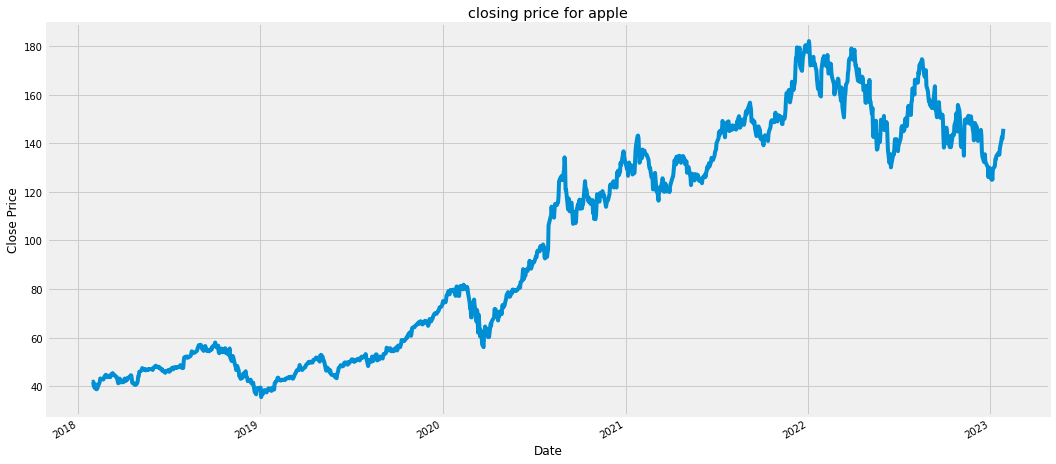

In [71]:
# Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('closing price for apple')
appl_df["Close"].plot()
plt.xlabel("Date")
plt.ylabel("Close Price")

In [72]:
appl_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-23,138.119995,143.320007,137.899994,141.110001,141.110001,81760300
2023-01-24,140.309998,143.160004,140.300003,142.529999,142.529999,66435100
2023-01-25,140.889999,142.429993,138.809998,141.860001,141.860001,65799300
2023-01-26,143.169998,144.250000,141.899994,143.960007,143.960007,54105100
2023-01-27,143.160004,147.229996,143.080002,145.929993,145.929993,70492800


In [75]:
#Create new dataframe with only the 'Close Columns'
data = appl_df.filter(['Close'])

#Convert the dataframe to a numpy array
dataset = data.values

#Get the number of rows to train the model on
import math
training_data_len = math.ceil(len(dataset) * .7)

training_data_len

881

In [76]:
appl_df.shape

(1258, 6)

In [77]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaler_data = scaler.fit_transform(dataset)

scaler_data

array([[0.04229752],
       [0.04308269],
       [0.04368012],
       ...,
       [0.72586843],
       [0.74020661],
       [0.75365706]])

In [81]:
# Create the training data set
# Create the scaled training dataset
train_data = scaler_data[0:training_data_len, :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])

  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.04229752, 0.04308269, 0.04368012, 0.03125373, 0.02440898,
       0.03557224, 0.02961507, 0.02212169, 0.02427243, 0.03502604,
       0.0378083 , 0.04298027, 0.05257319, 0.05161729, 0.0506273 ,
       0.04929591, 0.05173679, 0.05685756, 0.06278058, 0.06179056,
       0.06132968, 0.05600409, 0.05806948, 0.0591107 , 0.05885465,
       0.0560553 , 0.05931553, 0.06450456, 0.06747461, 0.0644875 ,
       0.06187591, 0.06223435, 0.06115901, 0.05651618, 0.05641377,
       0.04963728, 0.04550654, 0.03883247, 0.05219767, 0.04463599,
       0.04146112, 0.04368012, 0.04180249, 0.04472134, 0.05021763,
       0.05224887, 0.04470428, 0.04755484, 0.05301698, 0.05163438,
       0.05453614, 0.05554322, 0.05740378, 0.06153453, 0.06085175,
       0.05224887, 0.04016386, 0.03934455, 0.03541862, 0.03663052])]
[0.037603481603397854]

[array([0.04229752, 0.04308269, 0.04368012, 0.03125373, 0.02440898,
       0.03557224, 0.02961507, 0.02212169, 0.02427243, 0.03502604,
       0.0378083 , 0.04298027, 0.0

In [82]:
#Convert the x_train and y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [84]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1) )
x_train.shape

(821, 60, 1)

In [85]:
# Build the LSTM layer
model = Sequential()
model.add(LSTM(50, return_sequences= True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))


In [86]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [87]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

821/821 [==============================] - 24s 25ms/step - loss: 0.0023


In [89]:
#Create the testing dataset
#Create a new array having scaled values from index 881 to 1258
test_data = scaler_data[training_data_len - 60: , :]

#Create the data set x_test and y_test
x_test =[]
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [90]:
# convert the data to a numpy array
x_test = np.array(x_test)

In [91]:
#Reshape the data (need to convert it in 3 d shape for LSTM)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [92]:
# get the models predicted price value
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

12/12 [==============================] - 1s 15ms/step


In [93]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean(predictions - y_test)**2)


In [94]:
rmse

7.274031560680278

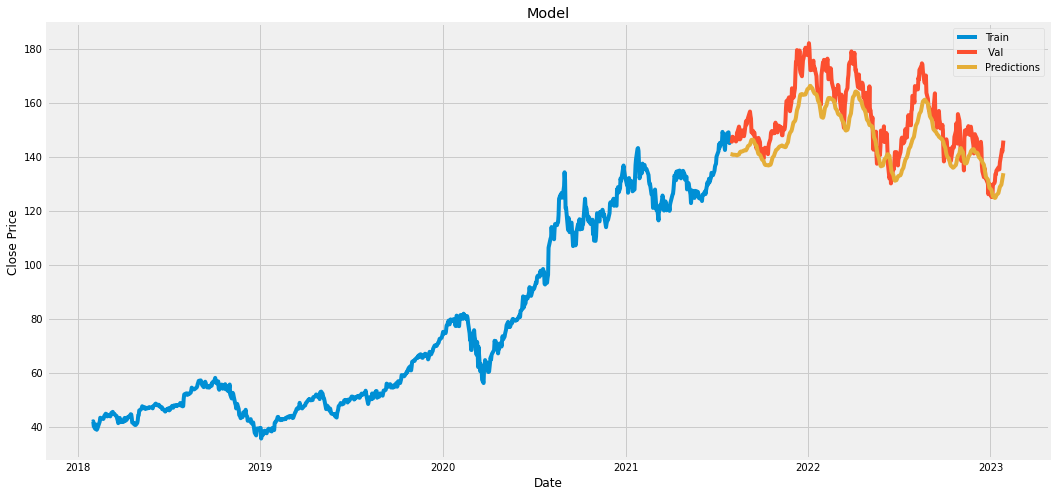

In [95]:
#plot the data
train = data[: training_data_len]
valid = data[training_data_len:]
valid["Predictions"] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("Date")
plt.ylabel('Close Price')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', ' Val', 'Predictions'])
plt.show()

In [96]:
#show the valid and predicted price
valid

,Close,Predictions
Date,,
2021-07-30,145.860001,140.965820
2021-08-02,145.520004,140.847443
2021-08-03,147.360001,140.695892
2021-08-04,146.949997,140.651810
2021-08-05,147.059998,140.646423
...,...,...
2023-01-23,141.110001,129.573730
2023-01-24,142.529999,130.556183
2023-01-25,141.860001,131.671082


In [99]:
# Get the quote
import pandas_datareader as web
apple_quote = appl
#Create a new dataframe
new_df = apple_quote.filter(["Close"])
# Get the last 60 day closing price value and convert the dataframe to an array
last_60_days = new_df[-60:].values

# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

#Create a empty list
X_test = []

#append the valuesfor past 60 days 
X_test.append(last_60_days_scaled)

#Covert the x_test data set to a numpy array
X_test = np.array(X_test)

# Reshape the data
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1 ))

# Get the predicted scaled price
pred_price = model.predict(X_test)

#undo the scaling
pre_price = scaler.inverse_transform(pred_price)

print(pre_price)


1/1 [==============================] - 0s 45ms/step
[[135.01083]]


In [108]:
# Get the quote
import yfinance as yf
data = yf.download(tickers = "AApl",
                  start= '2023-01-30',
                  end = '2023-01-31')
print(data['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2023-01-30 00:00:00-05:00    143.0
Name: Close, dtype: float64


In [110]:
appl.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1253,2023-01-23,138.119995,143.320007,137.899994,141.110001,141.110001,81760300
1254,2023-01-24,140.309998,143.160004,140.300003,142.529999,142.529999,66435100
1255,2023-01-25,140.889999,142.429993,138.809998,141.860001,141.860001,65799300
1256,2023-01-26,143.169998,144.250000,141.899994,143.960007,143.960007,54105100
1257,2023-01-27,143.160004,147.229996,143.080002,145.929993,145.929993,70492800
